In [123]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.read_csv("D:\shivam\\termdeposit_train.csv")
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'subscribed')

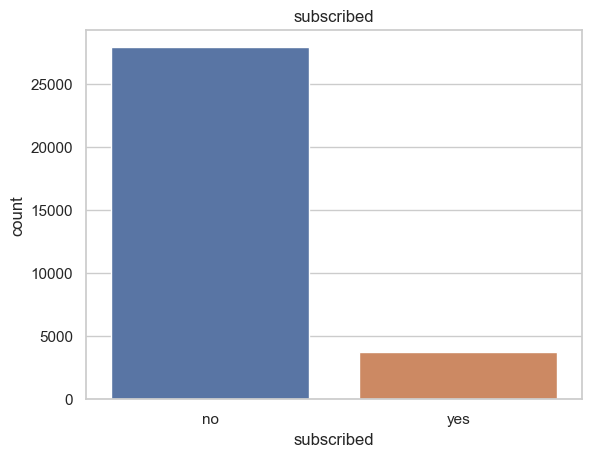

In [6]:
sns.set(style="whitegrid")
sns.countplot('subscribed', data=data).set_title('subscribed')

In [31]:
data['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [32]:
data1=data.replace(['yes','no','telephone', 'cellular', 'unknown','unknown', 'secondary', 'tertiary', 'primary','married', 'divorced', 'single','unknown', 'success', 'failure', 'other','admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed','nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,39,40,41,42])

In [33]:
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,17,10,6,2,1933,2,2,3,19,31,44,2,-1,0,13,2
1,40576,31,18,10,7,2,3,2,2,4,20,32,91,2,-1,0,13,2
2,15320,27,19,10,7,2,891,1,2,4,18,32,240,1,-1,0,13,2
3,43962,57,20,11,8,2,3287,2,2,4,22,33,867,1,84,3,14,1
4,29842,31,21,10,7,2,119,1,2,4,4,34,380,1,-1,0,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,20,12,8,2,0,1,2,4,12,37,116,2,-1,0,13,2
31643,40178,53,20,11,8,2,380,2,1,4,5,33,438,2,-1,0,13,1
31644,19710,32,20,12,8,2,312,2,2,4,7,38,37,3,-1,0,13,2
31645,38556,57,21,10,7,2,225,1,2,3,15,37,22,7,337,12,15,2


In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          31647 non-null  int64
 1   age         31647 non-null  int64
 2   job         31647 non-null  int64
 3   marital     31647 non-null  int64
 4   education   31647 non-null  int64
 5   default     31647 non-null  int64
 6   balance     31647 non-null  int64
 7   housing     31647 non-null  int64
 8   loan        31647 non-null  int64
 9   contact     31647 non-null  int64
 10  day         31647 non-null  int64
 11  month       31647 non-null  int64
 12  duration    31647 non-null  int64
 13  campaign    31647 non-null  int64
 14  pdays       31647 non-null  int64
 15  previous    31647 non-null  int64
 16  poutcome    31647 non-null  int64
 17  subscribed  31647 non-null  int64
dtypes: int64(18)
memory usage: 4.3 MB


In [110]:
x=data1.iloc[:,[1,2,3,4,5,6,7,8,11,12]]
y=data1.iloc[:,-1]

In [111]:
x

,age,job,marital,education,default,balance,housing,loan,month,duration
0,56,17,10,6,2,1933,2,2,31,44
1,31,18,10,7,2,3,2,2,32,91
2,27,19,10,7,2,891,1,2,32,240
3,57,20,11,8,2,3287,2,2,33,867
4,31,21,10,7,2,119,1,2,34,380
...,...,...,...,...,...,...,...,...,...,...
31642,29,20,12,8,2,0,1,2,37,116
31643,53,20,11,8,2,380,2,1,33,438
31644,32,20,12,8,2,312,2,2,38,37
31645,57,21,10,7,2,225,1,2,37,22


In [94]:
y

0        2
1        2
2        2
3        1
4        2
        ..
31642    2
31643    1
31644    2
31645    2
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [113]:
Rf = RandomForestClassifier()
Rf.fit(x_train, y_train)

RandomForestClassifier()

In [114]:
y_pred = Rf.predict(x_test)
score = metrics.accuracy_score(y_pred,y_test)

In [115]:
score

0.8919431279620853

In [128]:
x_test

,age,job,marital,education,default,balance,housing,loan,month,duration
16529,60,27,10,9,2,2408,2,2,39,102
19712,34,20,10,8,2,0,1,2,38,262
19771,55,22,10,9,2,3334,2,2,38,632
27786,31,20,12,8,2,635,1,2,37,293
14013,27,20,12,8,2,616,1,2,37,685
...,...,...,...,...,...,...,...,...,...,...
26101,34,19,10,7,2,-508,1,2,37,309
24125,30,23,12,7,2,609,1,2,37,402
11791,29,21,12,7,2,-13,1,2,37,512
14716,29,17,12,7,2,405,1,2,37,84


In [124]:
cm=confusion_matrix(y_test,y_pred)

In [125]:
cm

array([[ 235,  481],
       [ 203, 5411]], dtype=int64)

In [99]:
data2=pd.read_csv("D:\shivam\\termdeposit_test.csv")

In [100]:
data2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [101]:
data3=data2.replace(['yes','no','telephone', 'cellular', 'unknown','unknown', 'secondary', 'tertiary', 'primary','married', 'divorced', 'single','unknown', 'success', 'failure', 'other','admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed','nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,39,40,41,42])

In [102]:
data3

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,19,10,7,2,118,1,2,4,15,37,20,6,-1,0,13
1,40403,78,22,11,9,2,2787,2,2,3,1,32,372,1,-1,0,13
2,3709,31,25,12,8,2,144,1,2,5,16,37,676,1,-1,0,13
3,37422,57,19,12,9,2,3777,1,2,3,13,37,65,2,-1,0,13
4,12527,45,23,11,7,2,-705,2,1,5,3,32,111,1,-1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,20,10,8,2,45,2,2,4,28,38,148,4,-1,0,13
13560,11743,54,23,10,9,2,2281,1,2,5,20,33,158,1,-1,0,13
13561,28292,35,22,10,9,2,285,1,2,4,29,36,136,1,-1,0,13
13562,45163,29,17,12,7,2,464,2,2,4,9,31,208,2,91,3,14


In [116]:
x=data3.iloc[:,[1,2,3,4,5,6,7,8,11,12]]

In [117]:
yy_pred = Rf.predict(x)

In [118]:
yy_pred

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [107]:
print(" If your result is 1: YES\n If your result is 2: NO")

 If your result is 1: YES
 If your result is 2: NO
